In [37]:
import pandas as pd
import numpy as np

def load_and_preprocess_data(filepath, date_col, value_col):
    """
    Load time series data
    Args:
        filepath (string): path to the file with time series data
        date_col (string): name of column containing time indexes of time series
        value_col (string): name of column containing values of time series

    Returns:
        pd.Series: series indexed by dates
    """
    df = pd.read_csv(filepath)
    df[date_col] = pd.to_datetime(df[date_col])  
    ts = pd.Series(df[value_col].values, index=df[date_col])
    return ts


In [38]:
import matplotlib.pyplot as plt

def plot_time_series(ts, ylabel, title):
    """
    Plot a time series with labels and a title.
    Args:
        ts (pd.Series): time series to be plotted
        ylabel (string): label for y-axis
        title (string): title for the plot
    """
    plt.figure(figsize=(10, 6))
    ts.plot()
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [77]:
import warnings
warnings.filterwarnings('ignore')
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


def fit_arima_model(ts, train_frac=0.8):
    """
    Fit an ARIMA model and return the model, train, and test sets.
    
    Args:
        ts (pd.Series): The time series data.
        train_frac (float, optional): The fraction of data to use for training. Defaults to 0.8.

    Returns:
        results (ARIMA): The fitted ARIMA model.
        train (pd.Series): The training data.
        test (pd.Series): The test data.
    """
    train_size = int(len(ts) * train_frac)
    train, test = ts.iloc[:train_size], ts.iloc[train_size:]

    p = range(0, 10)  # Example range for AR order
    d = range(0, 3)  # Example range for differencing
    q = range(0, 10)  # Example range for MA order

    # Generate all different combinations of p, d, and q triplets
    pdq = list(itertools.product(p, d, q))

    def evaluate_arima_model(data, test_data, arima_order):
        """ Returns the MAPE for an ARIMA model on the test set """
        try:
            # Fit the ARIMA model
            model = ARIMA(data, order=arima_order)
            model_fit = model.fit()

            # Forecast the same length as the test set
            forecast = model_fit.forecast(steps=len(test_data))

            # Calculate the evaluation metric (e.g., MAPE)
            mape = mean_absolute_percentage_error(test_data, forecast)
            return mape
        except Exception as e:
            print(f'ARIMA order {arima_order} failed: {str(e)}')
            return float('inf')  # Return a large number if the model fails

    # Assume the best MAPE is a large number
    best_mape = float('inf')
    best_order = None

    # Grid search over parameter space
    for order in pdq:
        mape = evaluate_arima_model(train, test, order)
        if mape < best_mape:
            best_mape = mape
            best_order = order

    print(f"Best ARIMA order based on MAPE: {best_order} with MAPE = {best_mape}")

    # Fit the best ARIMA model
    model = ARIMA(train, order=best_order)
    results = model.fit()

    return results, train, test


def evaluate_forecast(test, predictions):
    """
    Calculate and print forecast accuracy metrics.
    Args:
        test (array): test data
        predictions (arrat): forecasted data
    """
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')


In [78]:

def plot_forecast_results(train, test, predictions, ylabel, title):
    """
    Plot training data, test data, and predictions.
    Args:
        train (array): train data
        test (array): test data
        predictions (array): forecasted data
        ylabel (string): label for y-axis
        title (string): plot title
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train', color='blue')
    plt.plot(test.index, test, label='Test', color='orange')
    plt.plot(predictions.index, predictions, label='Predicted', color='green')
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


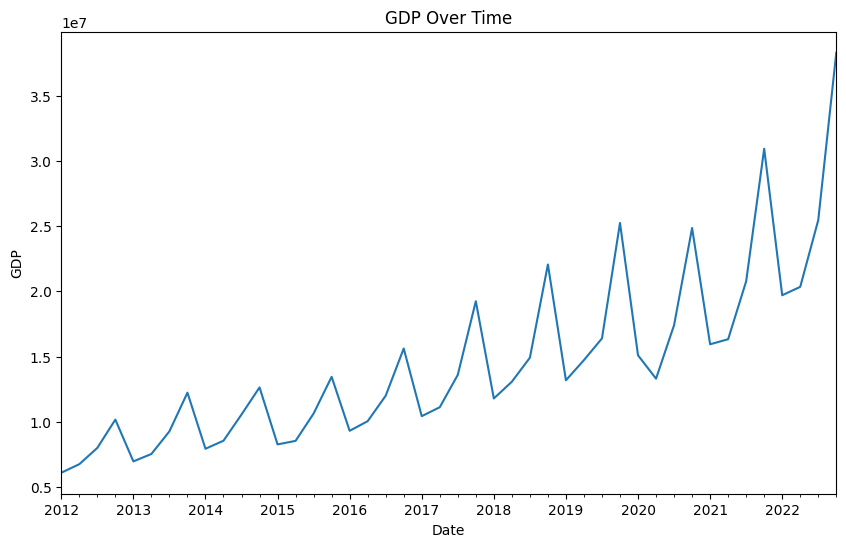

Best ARIMA order based on MAPE: (4, 2, 1) with MAPE = 0.10631494346484699
Mean Absolute Error (MAE): 2716660.32
Mean Absolute Percentage Error (MAPE): 10.63%


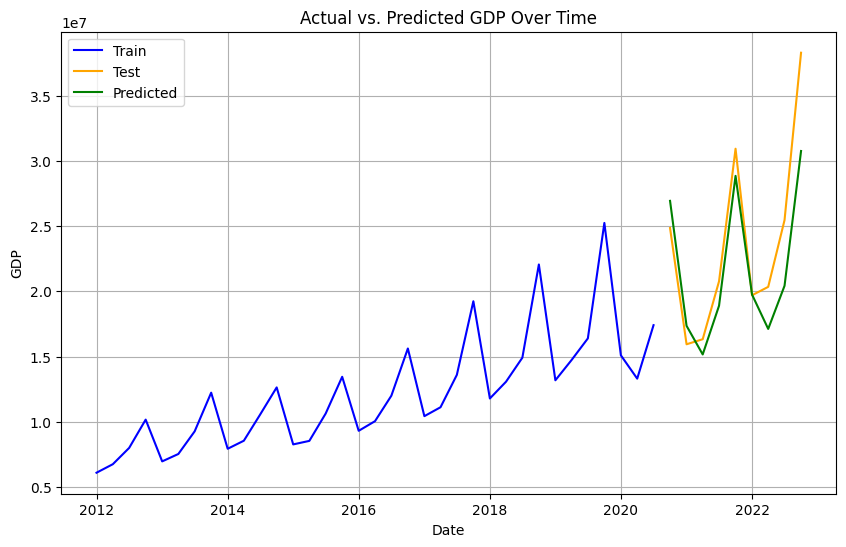

In [74]:
gdp_ts = load_and_preprocess_data('GDP_data.csv', 'Date', 'Value')
plot_time_series(gdp_ts, 'GDP', 'GDP Over Time')

results, train, test = fit_arima_model(gdp_ts)

predictions = results.predict(start=test.index[0], end=test.index[-1], typ='levels')
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='GDP', title='Actual vs. Predicted GDP Over Time')


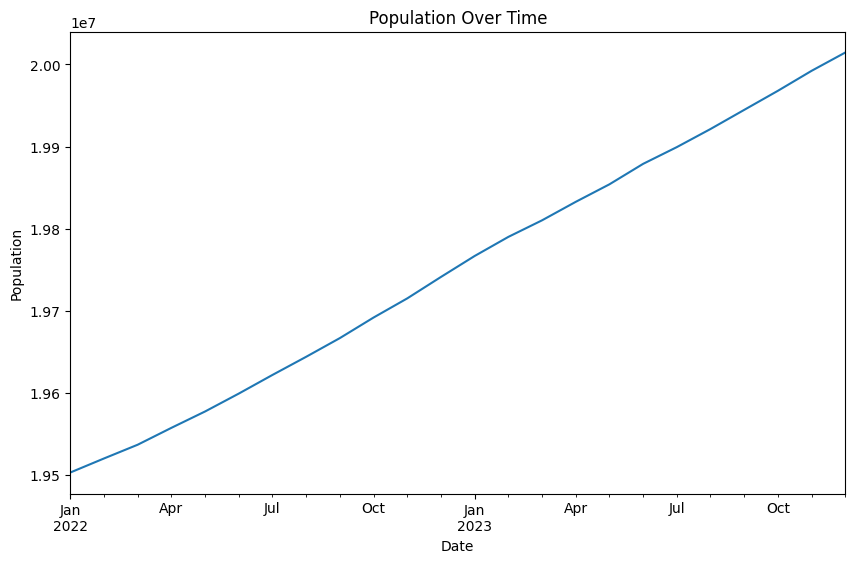

ARIMA order (4, 0, 0) failed: LU decomposition error.
Best ARIMA order based on MAPE: (2, 1, 2) with MAPE = 0.00020397702248200821
Mean Absolute Error (MAE): 4077.38
Mean Absolute Percentage Error (MAPE): 0.02%


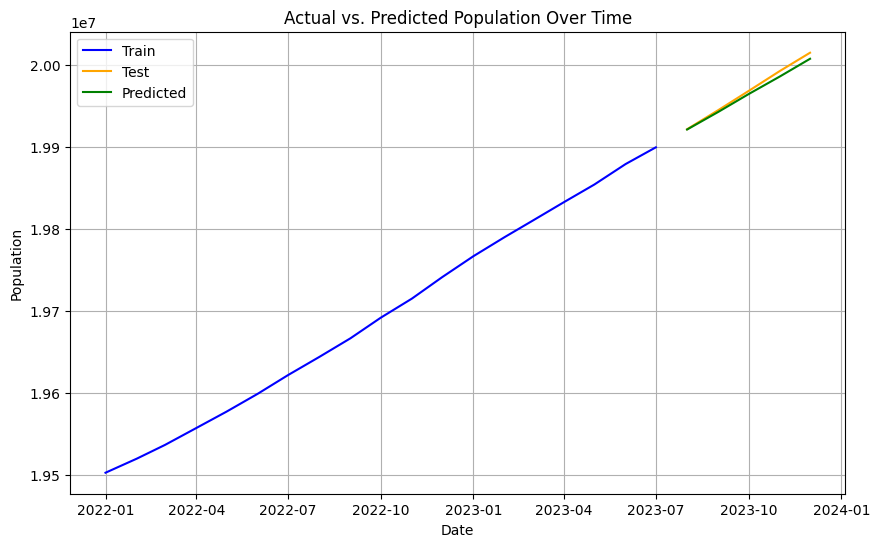

In [75]:
gdp_ts = load_and_preprocess_data('population_data.csv', 'Date', 'Value')
plot_time_series(gdp_ts, 'Population', 'Population Over Time')

results, train, test = fit_arima_model(gdp_ts)

predictions = results.predict(start=test.index[0], end=test.index[-1], typ='levels')
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='Population', title='Actual vs. Predicted Population Over Time')


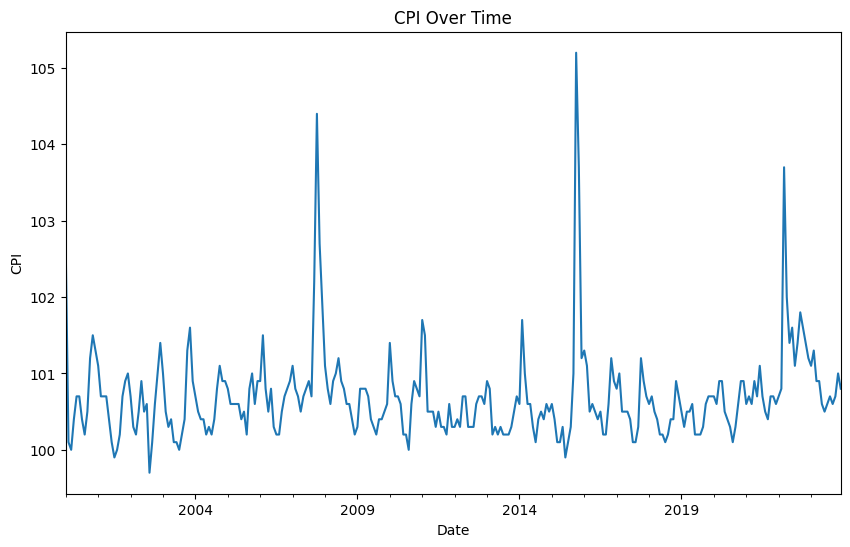

Best ARIMA order based on MAPE: (1, 0, 0) with MAPE = 0.0032756139988152503
Mean Absolute Error (MAE): 0.33
Mean Absolute Percentage Error (MAPE): 0.33%


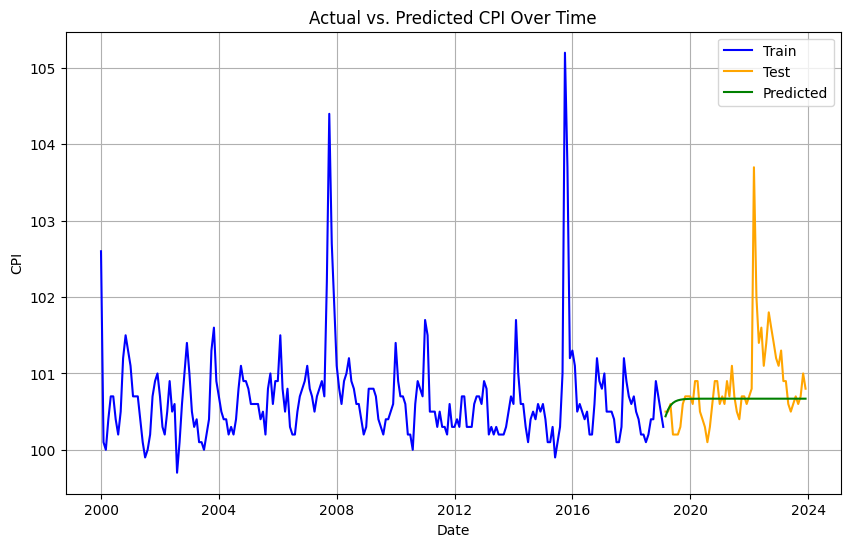

In [80]:
gdp_ts = load_and_preprocess_data('CPI_data.csv', 'Date', 'Value')
plot_time_series(gdp_ts, 'CPI', 'CPI Over Time')

results, train, test = fit_arima_model(gdp_ts)

predictions = results.predict(start=test.index[0], end=test.index[-1], typ='levels')
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='CPI', title='Actual vs. Predicted CPI Over Time')


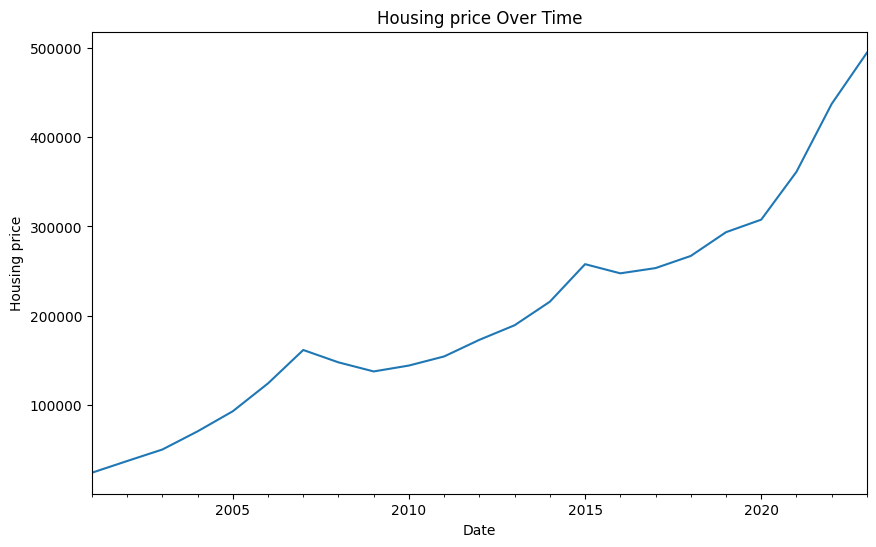

ARIMA order (1, 1, 4) failed: LU decomposition error.
ARIMA order (4, 2, 3) failed: LU decomposition error.
ARIMA order (8, 2, 3) failed: LU decomposition error.
ARIMA order (9, 2, 2) failed: LU decomposition error.
ARIMA order (9, 2, 3) failed: LU decomposition error.
Best ARIMA order based on MAPE: (9, 1, 2) with MAPE = 0.056795645230927304
Mean Absolute Error (MAE): 23141.25
Mean Absolute Percentage Error (MAPE): 5.68%


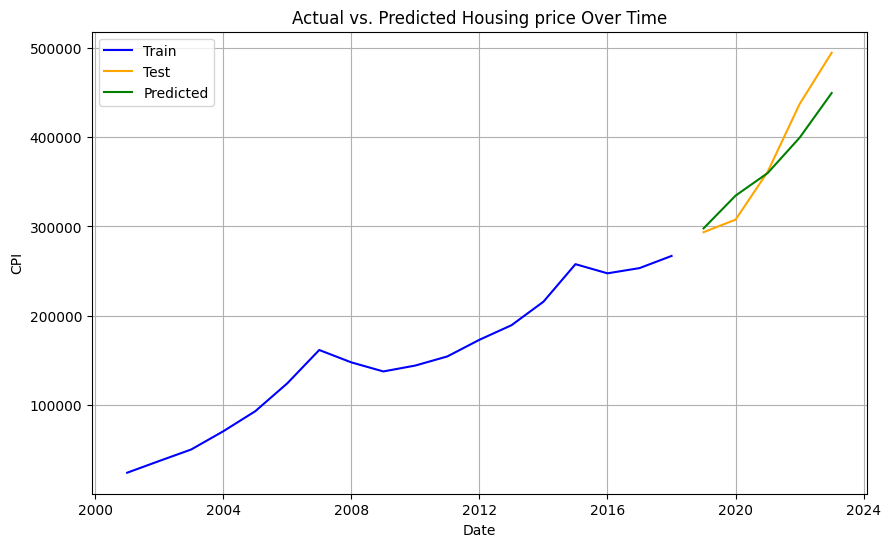

In [81]:
gdp_ts = load_and_preprocess_data('housing_data.csv', 'Date', 'Value')
plot_time_series(gdp_ts, 'Housing price', 'Housing price Over Time')

results, train, test = fit_arima_model(gdp_ts)

predictions = results.predict(start=test.index[0], end=test.index[-1], typ='levels')
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='CPI', title='Actual vs. Predicted Housing price Over Time')


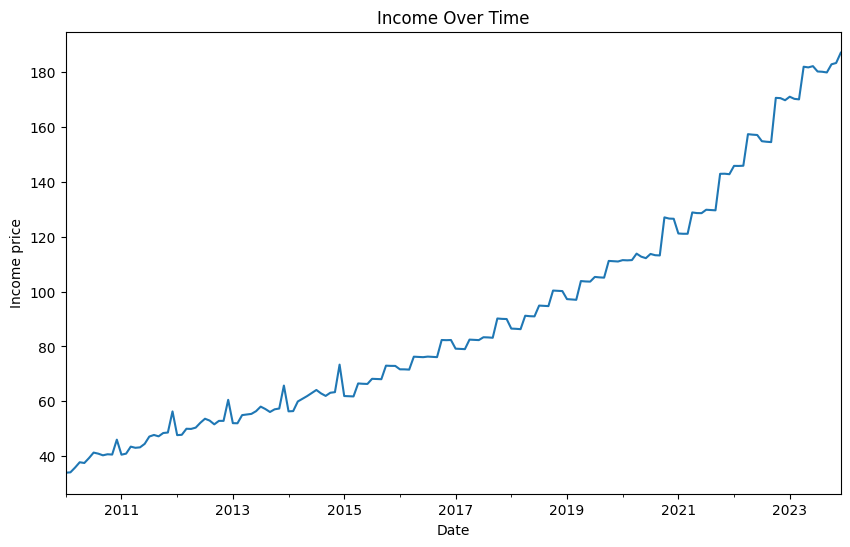

ARIMA order (7, 1, 8) failed: LU decomposition error.
Best ARIMA order based on MAPE: (9, 2, 0) with MAPE = 0.048345733310544634
Mean Absolute Error (MAE): 8.00
Mean Absolute Percentage Error (MAPE): 4.83%


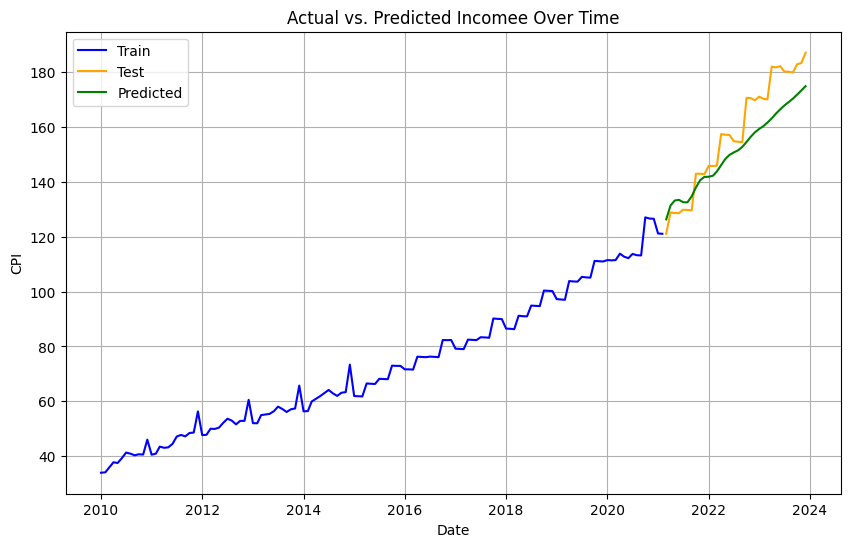

In [82]:
gdp_ts = load_and_preprocess_data('income_data.csv', 'Date', 'Value')
plot_time_series(gdp_ts, 'Income price', 'Income Over Time')

results, train, test = fit_arima_model(gdp_ts)

predictions = results.predict(start=test.index[0], end=test.index[-1], typ='levels')
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='CPI', title='Actual vs. Predicted Incomee Over Time')
